In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The Reuters Corpus

## Question
In the course of this class, we now have 5000 news articles loaded up in our computers. It seems that this is the perfect opportunity to build some healthier habits. Instead of distracting ourselves (in class or elsewhere) with dopamine-injecting tiktoks, cortisol-producing tweets, or the New York Times' latest take on word searches, what if we could do some light reading, based on our favorite subjects?

This exercise will relate a given query's similarity to the Reuters C50 documents based on Tf/Idf frequency. It will return a "similarity score" between the query and each document to relate each query to its most similar documents.

## Approach
Steps taken:

Importing needed packages: Some packages are necessary to import in order to read in a downloaded folder, like os and glob. Other packages to import are common NLP paclages, like spacy, nltk, stopwords, and TfidfVectorizer. Cosine similarity is also used to compare similarity scores between high-dimensional vectors. A folder_path variable leading to the Corpus folder is also instantiated.

Loading in data: A function is created to load in the Reuters C50 folder. From here, the train and test folders, which are within the Reuters C50 folder, are loaded in while using the same folder path specified for the C50 folder. Each file is read in as a text file, and converted in to a dataframe with the columns 'text,' 'author,' and 'file.'

Pre-processing data: In preparation to pre-process text, stopwords are downloaded and set to English. The Spacy model 'en_core_web_sm' is also loaded. This is used to tokenize the text. A function, pre_process_a_single_text is created. This function lowercases and tokenizes the text, removes stopwords, lematizes (reduces the word to a basic version of itself, similar to stemming), and finally puts the transformed text back together. These new texts are joined onto the origianl dataframe in the column 'processed_text.'

Applying Tf/Idf vectorizer: N-grams are set to 1, and a TfIdfVectorizer is instantiates with its N-grams set. The vectorizer is fit to the processed_text column of the dataframe and a transformed corpus is made using the fit vectorizer and processed_text.

Running queries: Queries are instantiated, all in prose, all covering different subjects. In a loop, the query is processed using the earlier function and similarity scores are caluclated between the query and each document in the corpus, using cosine similarity as the distance function. Documents are then sorted in order of similarity score for the given query.

Generating Results: Within the same loop going over each query, the query and its most similar documents are printed, with their similarity scores. A plot is also generated for each query, showing a histogram of the similarity scores for all documents for a given query.


In [7]:
import os
import glob
folder_path = r'data\ReutersC50'
files = os.listdir(folder_path)
#print(f"Files in folder: {files}")
import numpy as np
import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
def load_reuters_data(folder_path):
    data = []
    for folder in ['c50train', 'c50test']:
        folder_path_full = os.path.join(folder_path, folder)
        for author_folder in os.listdir(folder_path_full):
            author_path = os.path.join(folder_path_full, author_folder)
            for file_name in glob.glob(os.path.join(author_path, '*.txt')):
                with open(file_name, 'r', encoding='utf-8', errors='ignore') as file:
                    text = file.read()
                data.append({'text': text, 'author': author_folder, 'file': file_name})
    return pd.DataFrame(data)

df = load_reuters_data(folder_path)

In [9]:
df.head()

,text,author,file
0,The Internet may be overflowing with new techn...,AaronPressman,C:\Users\ahi81\Downloads\ReutersC50\c50train\A...
1,The U.S. Postal Service announced Wednesday a ...,AaronPressman,C:\Users\ahi81\Downloads\ReutersC50\c50train\A...
2,Elementary school students with access to the ...,AaronPressman,C:\Users\ahi81\Downloads\ReutersC50\c50train\A...
3,An influential Internet organisation has backe...,AaronPressman,C:\Users\ahi81\Downloads\ReutersC50\c50train\A...
4,An influential Internet organisation has backe...,AaronPressman,C:\Users\ahi81\Downloads\ReutersC50\c50train\A...


In [10]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))
nlp_pipeline = spacy.load("en_core_web_sm")

def pre_process_a_single_text(text):
    text = text.lower()
    processed_text = []
    doc = nlp_pipeline(text)
    for token in doc:
        if token.text not in stops:
            lemmatized_token = token.lemma_
            processed_text.append(lemmatized_token)
    return " ".join(processed_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahi81\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df['processed_text'] = df['text'].apply(pre_process_a_single_text)


Query: Basketball is my favorite sport. I like the way they dribble up and down the court.

Document: China, stronghold of table tennis and kung fu, is trying its hand at professional basketball with the start on Saturday of a new league using American coaches and players.
The China New Basketball Alliance was set up earlier this year by the country's State Sports Commission along with Spectrum, a Hong Kong-based sports promotion company. 
The new league aims to offer an alternative to the existing China Basketball Association, which is made up entirely of Chinese players.
"One league is the local, provincial teams and one is definitely a professional league with foreign players and different rules," said Spectrum chief operating officer Andy Jay.
The alliance will use National Basketball Association (NBA) rules and generate all revenue through ticket sales and television advertising.
Each of the eight teams has hired four players and a head coach from the United States, but only two 

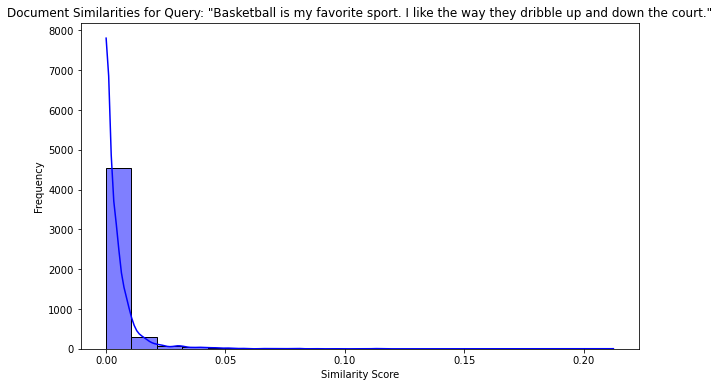


Query: It's hard to beat the heat in August in Texas. Not to mention the humidity.

Document: Texas Instruments Inc. said Tuesday it set a licensing pact with Samsung Electronics Co. Ltd. of Korea that will generate royalty payments of more than $1 billion over 10 years.
In exchange, each side agreed to drop pending patent infringement lawsuits against each other.
The agreement replaces a previous five-year deal that expired at the end of 1995, the Dallas-based maker of computer chips, notebook computers and other electronics products said.
While the deal reassured some Wall Street analysts who were not already counting on additional earnings from the settlement, others noted the terms appeared to be far less generous than one with Samsung in 1995.
"Texas Instruments appears willing to take a lower number to get the suits dropped against them," Merrill Lynch analyst Thomas Kurlak said.
"Our assessment is that the agreement is at roughly 40 to 50 percent of the rate of the old agreemen

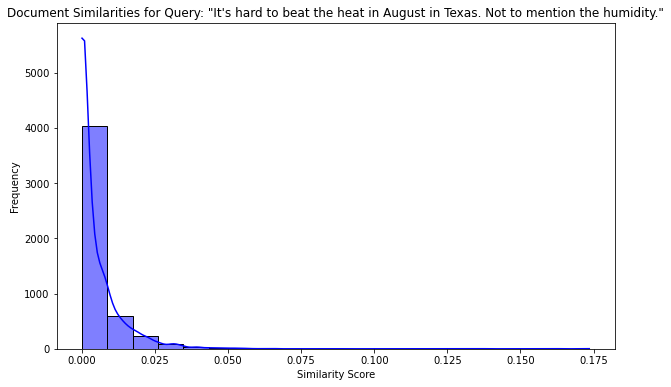


Query: It's fun to study machine learning, data science, and artificial intelligence at the McCombs School of    Business at the University of Texas at Austin

Document: Elementary school students with access to the Internet learned more than kids who lacked access, an indepedent research group concluded after conducting a comparative study in seven urban school districts.
"This study dramatically illustrates the positive effects of online use on learning," said Michael Casserly, executive director of the Council of Great City Schools, an association of 49 large inner city public school districts which co-sponsored the study along with Scholastic Corp.
, Score: 0.25027846491768374


Document: Austin Reed Group Plc supplier of pinstriped suits to generations of British businessmen, said on Wednesday that a return to favour with women executives helped to boost its first-half profits and sales.
The group, which has around 50 stores in the UK and sells its classic-cut styles in Europe, J

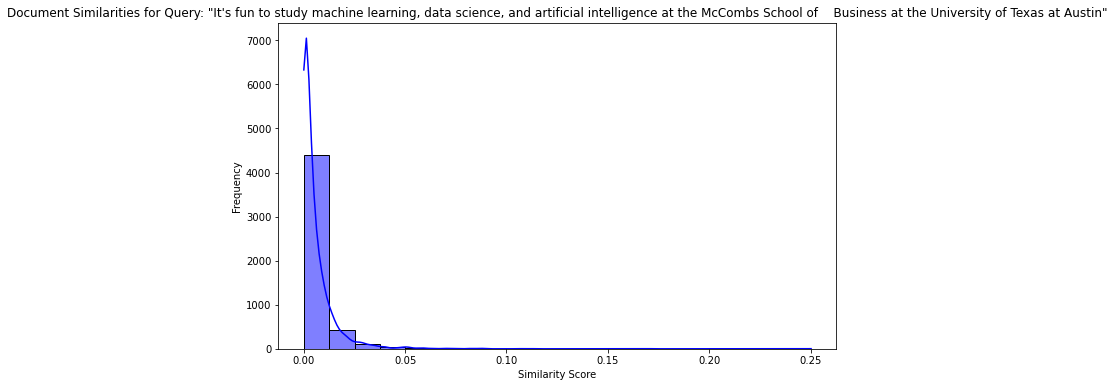

In [12]:
N = 1  # Change this to the desired value for N-grams

# Initialize the TfidfVectorizer with N-gram range
vectorizer = TfidfVectorizer(ngram_range=(N, N), lowercase=True, binary=False)

# Fit the vectorizer on the preprocessed corpus
vectorizer.fit(df['processed_text'])

# Transform the corpus
tfidf_transformed_corpus = vectorizer.transform(df['processed_text'])

# Transform the query
queries = [
    "Basketball is my favorite sport. I like the way they dribble up and down the court.",
    "It's hard to beat the heat in August in Texas. Not to mention the humidity.",
    "It's fun to study machine learning, data science, and artificial intelligence at the McCombs School of\
    Business at the University of Texas at Austin" 
]

# Process and compute similarity for each query
for query in queries:
    pre_processed_query = pre_process_a_single_text(query)  # Ensure this uses the pre-processing function
    tfidf_transformed_query = vectorizer.transform([pre_processed_query])
    
    # Compute similarity scores
    similarity_scores = cosine_similarity(tfidf_transformed_query, tfidf_transformed_corpus).flatten()
    
    # Rank the documents based on similarity scores
    ranked_documents = sorted(enumerate(similarity_scores), key=lambda x: x[1], reverse=True)
    
    # Print results for the current query
    print(f"\nQuery: {query}\n")
    for document_idx, score in ranked_documents[:5]:
        print(f"Document: {df['text'].iloc[document_idx]}, Score: {score}\n\n")
        
    plt.figure(figsize=(10, 6))
    sns.histplot(similarity_scores, bins=20, kde=True, color='blue')
    plt.title(f'Document Similarities for Query: "{query}"')
    plt.xlabel('Similarity Score')
    plt.ylabel('Frequency')
    plt.show()

## Results

The results of this approach come in the form of similarity scores, based on Tf/Idf similarity between query and each document. The TfIdfVectorizer is fit to the entire corpus of documents, and cosine similarity is found between each short query and longer document. 
<br><br>
The highest of these queries is about 0.25, coming from the third query, a sentence about studying topics like machine learning and artificial intelligence at UT Austin. This is in relation to a rather short document about how internet access is important to students' learning. Another interesting query-document pair comes with the first query, a popular lyric from Kurtis Blow's song Basketball. The most similar document to this query is an article on the up-and-coming Chinese basketball league, and how some Americans are fitting in to the league. After this comes an article on Rupert Murdoch's foray into sports brodcasting, in the U.S and abroad. Following these two sports articles comes an article (which appears in the data twice) regarding court decisions restricting monopolies in the communications sector. The word 'court' appears multiple times in this article, but not in the sense of a basketball court. 
<br><br>
Evidently, Tf/Idf is not able to extract the meanings of words like how more modern techniques do, so it can confound words with multiple meanings.
Other similar documents include articles on Texas Instruments, legal proceedings, and weather in the Ivory Coast and its effect on cocoa production for the query on Texas' hot weather, and a British business called Austin Reed Group, along with three articles that also show up in the results of the second query for the final query on studying at UT.
Also present are graphs showing the similarity of each document for each query. It is clear to see that only a handful of documents reach above even 0.05 similarity for each query. This is likely due to the wide range of subjects covered in the corpus, and the small size of the queries (one sentence) in comparison to the documents (ususally multiple paragraphs). 


## Conclusion

Overall, using Tf/Idf to find similarity between a query and a corpus of documents can be a quick and computationally cheap (relatively speaking) approach to potentially search for your topics of interest among many newd articles. However, there are some pitfalls. Some words contain double meanings, like the courts that LeBron James reigns supreme on, and the Supreme Court that interprets our laws. Tf/Idf is not able to differentiate between these two words, because it cannot relate meanings to given words. More modern technqiues can account for these 'meanings' by relating words to one-another via their co-occurrence, and representing words in a vector space, where words that are closer together have similar meaning.
The approach used here might be most effectively utilized with queries that look more like a keyword search, as query 3 someowhat mimics, rather than prose. If this technique were employed with a set of articles taken from Google News today, then a query like 'machine learning, A.I, artificial intelligence, data, programming' might find the widest scope of relevant results for that topic.